In [2]:
# import packages

from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from lacbox.io import ReadHAWC2
from lacbox.test import test_data_path

## evaluate HAWC2 result
speed, pitch angle, rotation speed, and electrical power1 vs. time must be presented in the same plot


In [7]:
fname = 'our_design/res/Group1_redesign_hawc2s_step_C1.hdf5'
h2res = ReadHAWC2(fname)

print(h2res.__dict__.keys())

names, units, desc = h2res.chaninfo
print('There are', len(names), 'channels in this output file.')
print(names)

# find the indices that we think correspond to flapwise blade moment
idx_blades = np.where(['Mx coo: blade' in name for name in names])[0]
print('Identified indices of blade channels are', idx_blades)

# print the corresponding description
[print(desc[i]) for i in idx_blades]

# print the coresponding units
[print(units[i]) for i in idx_blades];


dict_keys(['fname', 'data', 'chaninfo', 'nrch', 'nrsc', 'freq', 'fformat', 't', 'gtsdf_description'])
There are 113 channels in this output file.
['Time', 'bea1 angle', 'bea1 angle_speed', 'bea2 angle', 'bea2 angle_speed', 'bea2 angle', 'bea2 angle_speed', 'bea2 angle', 'bea2 angle_speed', 'Omega', 'Ae rot. torque', 'Ae rot. power', 'Ae rot. thrust', 'WSP gl. coo.,Vx', 'WSP gl. coo.,Vy', 'WSP gl. coo.,Vz', 'WSP gl. coo.,Abs_vhor', 'WSP gl. coo.,Vdir_hor', 'Mx coo: tower', 'My coo: tower', 'Mz coo: tower', 'Mx coo: tower', 'My coo: tower', 'Mz coo: tower', 'Mx coo: shaft', 'My coo: shaft', 'Mz coo: shaft', 'Mx coo: hub1', 'My coo: hub1', 'Mz coo: hub1', 'Mx coo: hub2', 'My coo: hub2', 'Mz coo: hub2', 'Mx coo: hub3', 'My coo: hub3', 'Mz coo: hub3', 'Mx coo: blade1', 'My coo: blade1', 'Mz coo: blade1', 'Mx coo: blade2', 'My coo: blade2', 'Mz coo: blade2', 'Mx coo: blade3', 'My coo: blade3', 'Mz coo: blade3', 'Mx coo: hub1', 'My coo: hub1', 'Mz coo: hub1', 'State pos x  coo: global', 'Stat

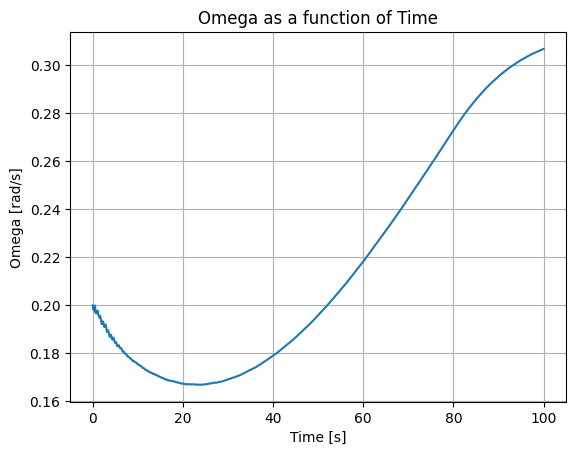

In [11]:
time_idx = np.where(np.array(names) == 'Time')[0][0]
omega_idx = np.where(np.array(names) == 'Omega')[0][0]

# Extract the data corresponding to 'Time' and 'Omega'
time_data = h2res.data[:, time_idx]
omega_data = h2res.data[:, omega_idx]

# Plot Omega as a function of Time
plt.figure()
plt.plot(time_data, omega_data)
plt.xlabel('Time [s]')
plt.ylabel('Omega [rad/s]')
plt.title('Omega as a function of Time')
plt.grid(True)
plt.show()